In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [43]:
df = pd.read_csv('insurance_data.csv', sep = ';')
df.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
0,1,F,0.0,Yes,Yes,23,Yes,No,No,NaN,12.0,Yes,"19,65","451,55",Y
1,2,F,1.0,No,No,42,Yes,Yes,Class A,3,1.0,Yes,"84,65","3541,35",N
2,3,F,0.0,Yes,No,72,Yes,No,No,NaN,12.0,No,"19,4","1496,45",Y
3,4,F,0.0,Yes,Yes,13,Yes,No,No,NaN,12.0,No,"19,55","265,3",Y
4,5,F,0.0,No,No,37,Yes,Yes,Class A,"3,4",1.0,No,"100,3","3541,4",Y


In [44]:
df.info() #We have null values in gender, is45OrOlder, premiumFrequency 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   insuree#                  5500 non-null   int64  
 1   gender                    5387 non-null   object 
 2   is45OrOlder               5404 non-null   float64
 3   isMarried                 5500 non-null   object 
 4   hasKids                   5500 non-null   object 
 5   insuredMonths             5500 non-null   int64  
 6   termLifeInsurance         5500 non-null   object 
 7   multipleTermLifePolicies  5500 non-null   object 
 8   healthInsurance           5500 non-null   object 
 9   healthRiders              3518 non-null   object 
 10  premiumFrequency          5386 non-null   float64
 11  eStatements               5500 non-null   object 
 12  monthlyPremium            5500 non-null   object 
 13  totalPremium              5500 non-null   object 
 14  renewal 

In [45]:
df.describe(include = 'all')

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
count,5500.000000,5387,5404.000000,5500,5500,5500.000000,5500,5500,5500,3518,5386.000000,5500,5500,5500,5500
unique,NaN,2,NaN,2,2,NaN,2,4,3,15,NaN,2,1524,5174,2
top,NaN,M,NaN,No,No,NaN,Yes,No,Class A,"3,4",NaN,Yes,"20,05","20,2",Y
freq,NaN,2719,NaN,2843,3857,NaN,4969,2654,2419,474,NaN,3225,49,10,4023
mean,2750.500000,NaN,0.162657,NaN,NaN,34.678909,NaN,NaN,NaN,NaN,4.086892,NaN,NaN,NaN,NaN
std,1587.857571,NaN,0.369087,NaN,NaN,42.225326,NaN,NaN,NaN,NaN,4.548742,NaN,NaN,NaN,NaN
min,1.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,1375.750000,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,2750.500000,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,4125.250000,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN


## Data Cleaning

##### Notes for data cleaning
1. Null values in gender, is45OrOlder, preniunFrequency, healthRiders
2. Most of the variables are in string format, need to change to proper categorical 
3. monthlyPremium and totalPremium are in string format instead of numerics 
4. multipleTermLifePolicies has some extra variables, need to inspect the relationship
5. healthInsurance is multi-class 


In [46]:
for column in ['gender', 'is45OrOlder', 'isMarried', 'hasKids', 'termLifeInsurance', 'multipleTermLifePolicies', 'healthInsurance', 'eStatements']:
    print(column, df[column].unique())

gender ['F' 'M' nan]
is45OrOlder [ 0.  1. nan]
isMarried ['Yes' 'No']
hasKids ['Yes' 'No']
termLifeInsurance ['Yes' 'No']
multipleTermLifePolicies ['No' 'Yes' 'no term life policy taken' 'term life policy not taken']
healthInsurance ['No' 'Class A' 'Class B']
eStatements ['Yes' 'No']


In [47]:
df.duplicated().any() #No duplicate rows in the dataframe

False

In [48]:
df.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
0,1,F,0.0,Yes,Yes,23,Yes,No,No,NaN,12.0,Yes,"19,65","451,55",Y
1,2,F,1.0,No,No,42,Yes,Yes,Class A,3,1.0,Yes,"84,65","3541,35",N
2,3,F,0.0,Yes,No,72,Yes,No,No,NaN,12.0,No,"19,4","1496,45",Y
3,4,F,0.0,Yes,Yes,13,Yes,No,No,NaN,12.0,No,"19,55","265,3",Y
4,5,F,0.0,No,No,37,Yes,Yes,Class A,"3,4",1.0,No,"100,3","3541,4",Y


In [49]:
#Convert isMarried, hasKids, termLifeInsurance, eStatements, renewal to binary features 
df = pd.read_csv('insurance_data.csv', sep = ';')
df['isMarried'] = df['isMarried'].apply(lambda x: 1 if x == 'Yes' else 0)
df['hasKids'] = df['hasKids'].apply(lambda x: 1 if x == 'Yes' else 0)
df['termLifeInsurance'] = df['termLifeInsurance'].apply(lambda x: 1 if x == 'Yes' else 0)
df['eStatements'] =  df['eStatements'].apply(lambda x: 1 if x == 'Yes' else 0)
df['renewal'] = df['renewal'].apply(lambda x: 1 if x == 'Y' else 0)
df.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
0,1,F,0.0,1,1,23,1,No,No,NaN,12.0,1,"19,65","451,55",1
1,2,F,1.0,0,0,42,1,Yes,Class A,3,1.0,1,"84,65","3541,35",0
2,3,F,0.0,1,0,72,1,No,No,NaN,12.0,0,"19,4","1496,45",1
3,4,F,0.0,1,1,13,1,No,No,NaN,12.0,0,"19,55","265,3",1
4,5,F,0.0,0,0,37,1,Yes,Class A,"3,4",1.0,0,"100,3","3541,4",1


In [50]:
df[df['totalPremium'] == ' '] #Empty strings for totalPremium  => Set these values to 0 first 

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
22,23,M,0.0,1,1,0,1,No,No,NaN,3.0,1,"19,7",,1
99,100,M,0.0,1,1,0,1,Yes,No,NaN,12.0,0,"25,35",,1
1428,1429,F,0.0,1,1,0,1,No,Class B,"1,2,3,4",12.0,0,"80,85",,1
2411,2412,M,0.0,1,1,0,1,Yes,No,NaN,12.0,0,"25,75",,1
2643,2644,F,0.0,1,1,0,1,Yes,Class B,"2,3",12.0,0,"73,35",,1
3332,3333,M,0.0,0,1,0,1,No,No,NaN,12.0,0,"20,25",,1
4585,4586,M,0.0,0,1,0,1,Yes,Class B,"1,2",12.0,1,"61,9",,1
4611,4612,M,0.0,1,1,0,1,No,No,NaN,12.0,0,"19,85",,1
4915,4916,F,0.0,1,1,0,0,no term life policy taken,Class B,"1,3",12.0,1,"52,55",,1


In [51]:
#Now convert monthly premium and total premium to floats
df['monthlyPremium'] = df['monthlyPremium'].str.replace(",", '.')
df['totalPremium'] = df['totalPremium'].str.replace(",", '.')
df['totalPremium']  = df['totalPremium'].str.replace(" ", '0')
df['monthlyPremium'] = df['monthlyPremium'].astype('float')
df['totalPremium'] = df['totalPremium'].astype('float')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   insuree#                  5500 non-null   int64  
 1   gender                    5387 non-null   object 
 2   is45OrOlder               5404 non-null   float64
 3   isMarried                 5500 non-null   int64  
 4   hasKids                   5500 non-null   int64  
 5   insuredMonths             5500 non-null   int64  
 6   termLifeInsurance         5500 non-null   int64  
 7   multipleTermLifePolicies  5500 non-null   object 
 8   healthInsurance           5500 non-null   object 
 9   healthRiders              3518 non-null   object 
 10  premiumFrequency          5386 non-null   float64
 11  eStatements               5500 non-null   int64  
 12  monthlyPremium            5500 non-null   float64
 13  totalPremium              5500 non-null   float64
 14  renewal 

###### Remaining Data cleaning issues
1. Null values in gender and is45OrOlder and premiumFrequency
2. MultipleTermLifePolicies and healthRiders
3. Check totalPremium null values

## Exploratory Data Analysis


Before deciding on how to handle multipleTermLifePolicies and healthRiders, we need to first see their relationship with termLifeInsurance and healthInsurance. 

In [53]:
pd.DataFrame(df.groupby(['termLifeInsurance', 'multipleTermLifePolicies']).size())

0
termLifeInsurance multipleTermLifePolicies        
0                 no term life policy taken    497
                  term life policy not taken    34
1                 No                          2654
                  Yes                         2315

In [54]:
pd.DataFrame(df.groupby(['healthInsurance', 'healthRiders']).size())

0
healthInsurance healthRiders     
Class A         1              85
                1,2            67
                1,2,3          56
                1,2,3,4       213
                1,2,4          47
                1,3            30
                1,3,4         122
                1,4            31
                2             159
                2,3            89
                2,3,4         326
                2,4            89
                3             160
                3,4           365
                4             163
Class B         1             192
                1,2           180
                1,2,3          70
                1,2,3,4       161
                1,2,4          84
                1,3            56
                1,3,4         106
                1,4            64
                2             145
                2,3            50
                2,3,4         108
                2,4            44
                3              78
                3,4           109
                4              69

In [55]:
df[df['healthRiders'].isnull()].groupby('healthInsurance').size()

healthInsurance
Class A     417
Class B     356
No         1209
dtype: int64

From the above tables, we can come to 2 conclusions:
1. 'term life policy not taken' and 'no term life policy taken' can be treated the same as 'No' value in column multipleTermLifePolicies
2. For users with health insurance, they would have a health rider, but not all people with health insurance must have a rider 

We can treat multipleTermLifePolicies as a binary variable, and use one-hot encoding for healthRiders. We need to have 1 column per various healthRider option for a total of 4 different rider column options, since users can have any combination of the riders

In [56]:
df['multipleTermLifePolicies'] = df['multipleTermLifePolicies'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
0,1,F,0.0,1,1,23,1,0,No,NaN,12.0,1,19.65,451.55,1
1,2,F,1.0,0,0,42,1,1,Class A,3,1.0,1,84.65,3541.35,0
2,3,F,0.0,1,0,72,1,0,No,NaN,12.0,0,19.40,1496.45,1
3,4,F,0.0,1,1,13,1,0,No,NaN,12.0,0,19.55,265.30,1
4,5,F,0.0,0,0,37,1,1,Class A,"3,4",1.0,0,100.30,3541.40,1


In [57]:
#One hot encode healthInsurance column
#Drop 'No' level to prevent correlation issues
df = pd.get_dummies(df, columns = ['healthInsurance']).drop('healthInsurance_No', axis = 1).copy() 

In [58]:
rider_1 = []
rider_2 = []
rider_3 = []
rider_4 = []
for row in df.itertuples():
    healthRiderIndex = df.columns.get_loc('healthRiders') + 1
    healthRiders = row[healthRiderIndex]
    if type(healthRiders) != str:#Null value
        rider_1.append(0)
        rider_2.append(0)        
        rider_3.append(0)
        rider_4.append(0)
    else:
        healthRiders = healthRiders.split(',')
        remaining = set([1,2,3,4])
        for val in healthRiders:
            if int(val) == 1:
                rider_1.append(1)
                remaining.remove(1)
            elif int(val) == 2:
                rider_2.append(1)
                remaining.remove(2)
            elif int(val) == 3:
                rider_3.append(1)
                remaining.remove(3)
            elif int(val) == 4:
                rider_4.append(1)    
                remaining.remove(4)
            else:
                raise ValueError('Unaccounted variable')
        for remaining in remaining:
            if remaining == 1:
                rider_1.append(0)
            elif remaining == 2:
                rider_2.append(0)
            elif remaining == 3:                
                rider_3.append(0)
            elif remaining == 4:
                rider_4.append(0)

df.head()


,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal,healthInsurance_Class A,healthInsurance_Class B
0,1,F,0.0,1,1,23,1,0,NaN,12.0,1,19.65,451.55,1,0,0
1,2,F,1.0,0,0,42,1,1,3,1.0,1,84.65,3541.35,0,1,0
2,3,F,0.0,1,0,72,1,0,NaN,12.0,0,19.40,1496.45,1,0,0
3,4,F,0.0,1,1,13,1,0,NaN,12.0,0,19.55,265.30,1,0,0
4,5,F,0.0,0,0,37,1,1,"3,4",1.0,0,100.30,3541.40,1,1,0


In [59]:
df['healthRider_1'] = rider_1
df['healthRider_2'] = rider_2
df['healthRider_3'] = rider_3
df['healthRider_4'] = rider_4
df.drop('healthRiders', axis = 1, inplace = True)

In [60]:
df.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal,healthInsurance_Class A,healthInsurance_Class B,healthRider_1,healthRider_2,healthRider_3,healthRider_4
0,1,F,0.0,1,1,23,1,0,12.0,1,19.65,451.55,1,0,0,0,0,0,0
1,2,F,1.0,0,0,42,1,1,1.0,1,84.65,3541.35,0,1,0,0,0,1,0
2,3,F,0.0,1,0,72,1,0,12.0,0,19.40,1496.45,1,0,0,0,0,0,0
3,4,F,0.0,1,1,13,1,0,12.0,0,19.55,265.30,1,0,0,0,0,0,0
4,5,F,0.0,0,0,37,1,1,1.0,0,100.30,3541.40,1,1,0,0,0,1,1


Text(0.5, 1.0, 'Count of renewals')

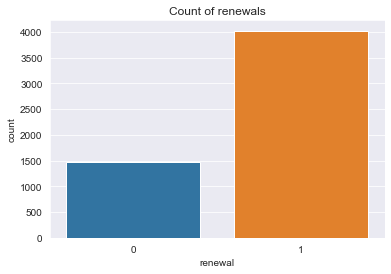

In [61]:
sns.countplot(data = df, x = 'renewal')
plt.title('Count of renewals')

40.48123291076311
18.874746106973596


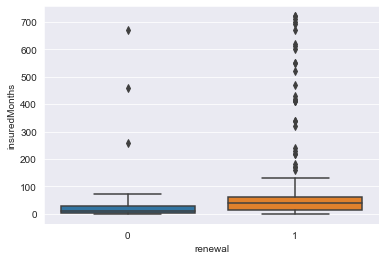

In [62]:
sns.boxplot(data = df, x = 'renewal', y = 'insuredMonths')
print(df[df['renewal'] == 1]['insuredMonths'].mean())
print(df[df['renewal'] == 0]['insuredMonths'].mean())


In [63]:
df['numRiders'] = df['healthRider_1'] + df['healthRider_2'] + df['healthRider_3'] + df['healthRider_4']
df['monthPremiumMonthInsured'] = df['monthlyPremium'] * df['insuredMonths']
df.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,premiumFrequency,eStatements,...,totalPremium,renewal,healthInsurance_Class A,healthInsurance_Class B,healthRider_1,healthRider_2,healthRider_3,healthRider_4,numRiders,monthPremiumMonthInsured
0,1,F,0.0,1,1,23,1,0,12.0,1,...,451.55,1,0,0,0,0,0,0,0,451.95
1,2,F,1.0,0,0,42,1,1,1.0,1,...,3541.35,0,1,0,0,0,1,0,1,3555.30
2,3,F,0.0,1,0,72,1,0,12.0,0,...,1496.45,1,0,0,0,0,0,0,0,1396.80
3,4,F,0.0,1,1,13,1,0,12.0,0,...,265.30,1,0,0,0,0,0,0,0,254.15
4,5,F,0.0,0,0,37,1,1,1.0,0,...,3541.40,1,1,0,0,0,1,1,2,3711.10


1.3912727272727272


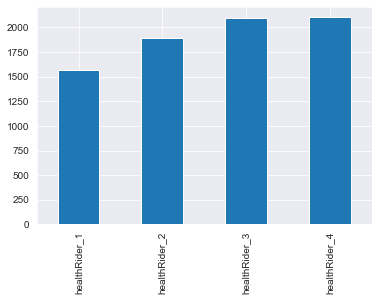

In [64]:
df[['healthRider_1','healthRider_2','healthRider_3','healthRider_4']].sum().plot(kind = 'bar')
print(df['numRiders'].mean())

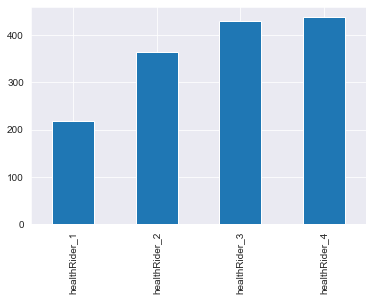

In [65]:
df[df['is45OrOlder'] == 1][['healthRider_1','healthRider_2','healthRider_3','healthRider_4']].sum().plot(kind = 'bar')

,insuredMonths,monthlyPremium,totalPremium,monthPremiumMonthInsured
insuredMonths,1.000000,0.019457,0.070517,0.137482
monthlyPremium,0.019457,1.000000,0.617800,0.883182
totalPremium,0.070517,0.617800,1.000000,0.710593
monthPremiumMonthInsured,0.137482,0.883182,0.710593,1.000000


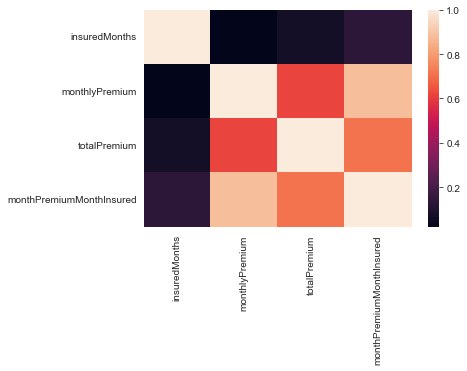

In [66]:
display(sns.heatmap(df[['insuredMonths', 'monthlyPremium', 'totalPremium', 'monthPremiumMonthInsured']].corr()))
df[['insuredMonths', 'monthlyPremium', 'totalPremium', 'monthPremiumMonthInsured']].corr()


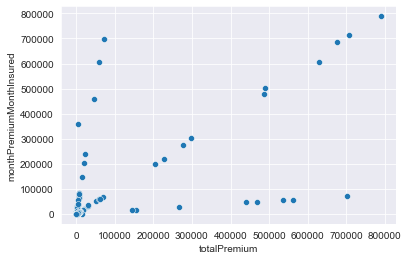

In [67]:
sns.scatterplot(data = df, x = 'totalPremium', y = 'monthPremiumMonthInsured')

In [68]:
df[abs(df['monthPremiumMonthInsured'] - df['totalPremium']) >= 1000]

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,premiumFrequency,eStatements,...,totalPremium,renewal,healthInsurance_Class A,healthInsurance_Class B,healthRider_1,healthRider_2,healthRider_3,healthRider_4,numRiders,monthPremiumMonthInsured
71,72,M,0.0,1,0,170,1,1,1.0,1,...,1742.50,1,1,0,0,1,1,1,3,17433.5
109,110,M,0.0,0,0,44,0,0,3.0,1,...,23754.00,0,0,1,0,1,1,1,3,237380.0
273,274,F,1.0,1,0,71,1,1,12.0,1,...,676695.00,1,1,0,1,1,0,0,2,684085.0
281,282,M,0.0,1,1,130,1,1,3.0,0,...,343.60,1,0,0,0,0,0,0,0,3185.0
284,285,F,0.0,1,1,410,1,0,12.0,0,...,804.25,1,0,0,0,0,0,0,0,8077.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110,5111,M,0.0,0,0,12,1,1,NaN,0,...,3162.00,1,0,0,0,0,0,0,0,300.0
5122,5123,M,0.0,1,1,71,1,1,3.0,0,...,630085.00,1,0,1,1,0,1,1,3,606695.0
5202,5203,NaN,0.0,0,0,2,0,0,1.0,0,...,3845.00,1,0,1,0,0,0,0,0,486.0
5443,5444,F,0.0,1,0,70,1,0,1.0,0,...,580.10,1,0,1,1,0,1,1,3,5687.5


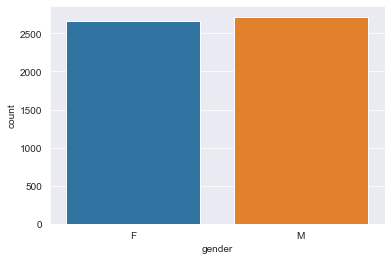

In [69]:
sns.countplot(data = df, x = 'gender')

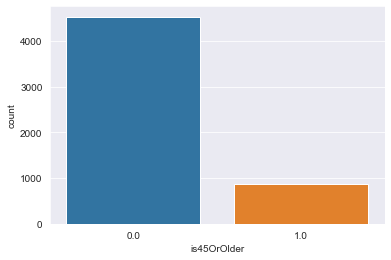

In [70]:
sns.countplot(data = df, x = 'is45OrOlder') #Most people are older 

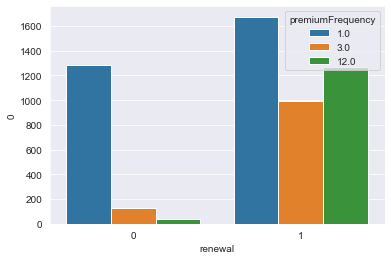

In [71]:
grouped_prem = pd.DataFrame(df.groupby(['renewal', 'premiumFrequency']).size()).reset_index()
sns.barplot(data = grouped_prem, x = 'renewal', y= 0, hue = 'premiumFrequency')

1.646188850967008
1.3409944751381215


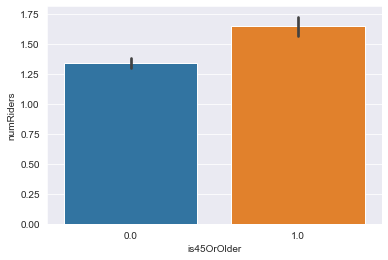

In [72]:
sns.barplot(data = df, x = 'is45OrOlder', y = 'numRiders')
print(df[df['is45OrOlder'] == 1]['numRiders'].mean())
print(df[df['is45OrOlder'] == 0]['numRiders'].mean())

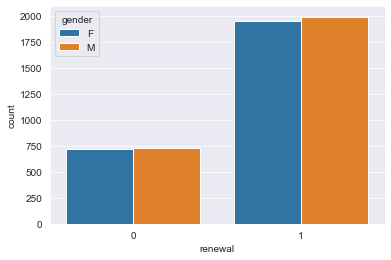

In [73]:
sns.countplot(data = df, x = 'renewal', hue = 'gender')

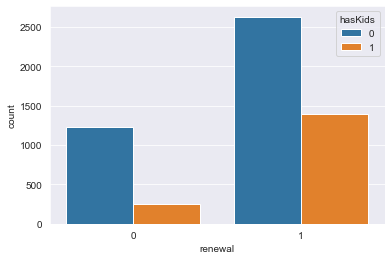

In [74]:
sns.countplot(data = df, x = 'renewal', hue = 'hasKids')

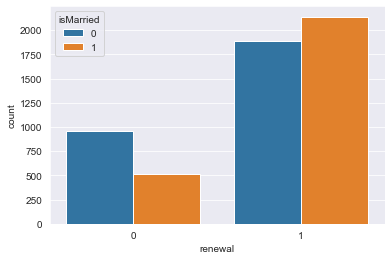

In [75]:
sns.countplot(data = df, x = 'renewal', hue = 'isMarried')

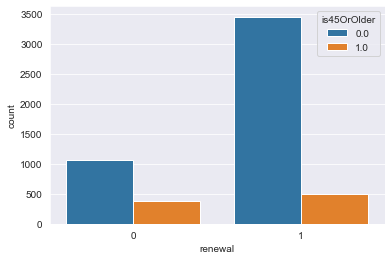

In [76]:
sns.countplot(data = df, x = 'renewal', hue = 'is45OrOlder')

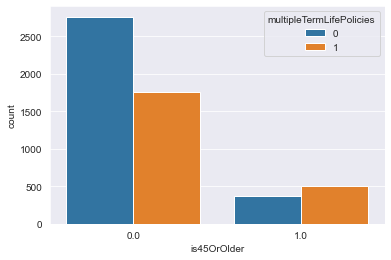

In [77]:
sns.countplot(data = df, x = 'is45OrOlder', hue = 'multipleTermLifePolicies')

From our data visualizations, we can make several interesting conclusions from the data given:
1. Gender does not seem to have much influence on whether people renew their insurance or not
2. Older people, being married and having kids has some relationship with renewal rates. 
    1. A higher proportion of people who renew their insurance have kids compared to people who dont renew their insurance
    2. A higher proportion of people who renew their insurance are married compared to people who dont renew their insurance
    3. A higher proportion of people who renew their insurance are younger compared to people who dont renew their insurance
3. The most popular is rider 4, followed by 3, 2 and 1. 
4. There are significanlty more people who renew their insurance compared to people who dont.
5. There is very high correlation between monthlyPremiums x monthsInsured and totalPremiums. 
6. For those rows with missing totalPremiums, their monthsInsured = 0, meaning that they have not paid any premiums thus far.
7. Majority of people who dont renew their insurance are actually paying monthly premiums, compared to those who do.
8. People who renew their insurance premiums tend to be insured for a more months.


<br>
Therefore, before modelling our data, we make several decisions: <br>
1. Since age and premium_frequency is important, we will drop any missing rows rather than trying to impute them <br>
2. Since gender is even in this dataset has not much impact on renewal rates, we will drop gender from the data and ignore the null values present <br>
Since we still have 5291 rows compared to the original 5500, most of the original data was actually preserved and we should be okay to drop the missing rows

In [78]:
df.drop(['insuree#', 'gender', 'numRiders', 'monthPremiumMonthInsured'], axis = 1, inplace = True)
df.dropna(inplace = True)
df['is45OrOlder'] = df['is45OrOlder'].astype(int)

In [80]:
df

,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal,healthInsurance_Class A,healthInsurance_Class B,healthRider_1,healthRider_2,healthRider_3,healthRider_4
0,0,1,1,23,1,0,12.0,1,19.65,451.55,1,0,0,0,0,0,0
1,1,0,0,42,1,1,1.0,1,84.65,3541.35,0,1,0,0,0,1,0
2,0,1,0,72,1,0,12.0,0,19.40,1496.45,1,0,0,0,0,0,0
3,0,1,1,13,1,0,12.0,0,19.55,265.30,1,0,0,0,0,0,0
4,0,0,0,37,1,1,1.0,0,100.30,3541.40,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0,1,1,4,1,1,1.0,1,85.95,381.30,0,1,0,0,0,0,1
5496,0,1,0,3,1,0,1.0,0,20.00,49.65,1,0,0,0,0,0,0
5497,0,1,0,56,1,0,3.0,1,80.90,4557.50,1,1,0,0,0,0,1
5498,0,1,1,54,1,0,12.0,0,20.40,1090.60,1,0,0,0,0,0,0


### Data modelling